# Data Analysis using Python

## Overview

In this project, several models have been developed for the prediction of car price using the variables or features of the car. It is just an estimate but should provide a fair idea of how much the car should cost.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("automobileEDA.csv")

In [7]:
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Simple Linear Regression

#### Relation of Highway-mpg with Price

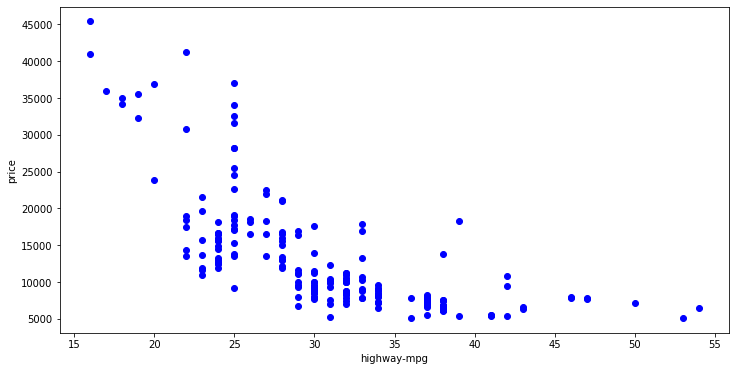

In [8]:
plt.figure(figsize = (12, 6))
plt.scatter(
    data['highway-mpg'],
    data['price'],
    c = 'blue'
)

plt.xlabel('highway-mpg')
plt.ylabel('price')
plt.show()

The graph, above, shows a relationship between the _highway-mpg_ and the _price_ of the car. Now, using this, the linear approximation of this data is generated:

In [9]:
X = data['highway-mpg'].values.reshape(-1, 1)
Y = data['price'].values.reshape(-1, 1)

lr = LinearRegression()
lr.fit(X, Y)

print("\nThe linear model is: Y = {:.5} + ({:.5}X)\n".format(lr.intercept_[0], lr.coef_[0][0]))


The linear model is: Y = 3.8423e+04 + (-821.73X)



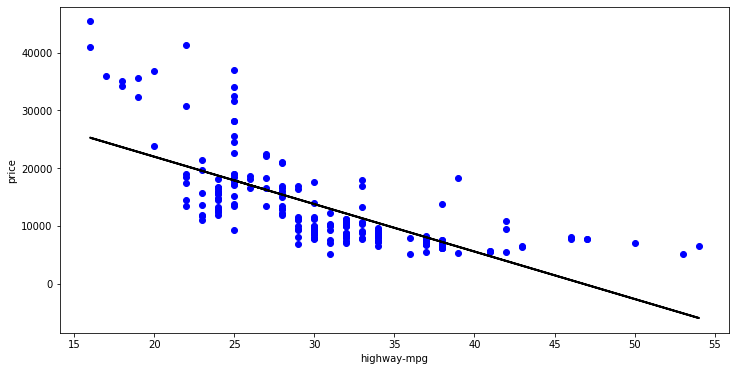

In [10]:
predictions = lr.predict(X)

plt.figure(figsize = (12, 6))
plt.scatter(
    data['highway-mpg'],
    data['price'],
    c = 'blue'
)

plt.plot(
    data['highway-mpg'],
    predictions,
    c = 'black',
    linewidth = 2
)

plt.xlabel('highway-mpg')
plt.ylabel('price')
plt.show()

From the graph above, it is evident how the linear model fits the data.

In [13]:
X = data['highway-mpg']
Y = data['price']

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           1.75e-31
Time:                        20:50:23   Log-Likelihood:                -2020.8
No. Observations:                 201   AIC:                             4046.
Df Residuals:                     199   BIC:                             4052.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.842e+04   1843.391     20.844      

Looking at the coefficients, we can see that the p-value is low (zero in fact). This means that there is a strong correlation between these coefficients and the price.

Further, looking at the R-square value, we have it as 0.497. Therefore, about 49.7% of the variability of the car price is explained by the _highway-mpg_ of the car. This is okay, but definitely not the best that can be done to accurately predict the price of the car. Surely, the other features must have a certain impact on the car price. Hence, we shall see if multiple regression gives us better result.

### Multiple Linear Regression

In [14]:
Z = data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

lr.fit(Z, data['price'])

lr.intercept_

-15806.624626329198

In [15]:
lr.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

The linear model is: 
Price = -15806.624626329198 + (53.49574423 x **horesepower**) + (4.70770099 x **curb-weight**) + (81.53026382 x **engine-size**) + (36.05748882 x **highway-mpg**)

It is not possible to visualize the impact of all four features on the the car price (at least not with a regression or residual plot), since it has a total of five dimensions.

In [16]:
A = np.column_stack((data['horsepower'], data['curb-weight'], data['engine-size'], data['highway-mpg']))
B = data['price']

X2 = sm.add_constant(A)
est = sm.OLS(B, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     208.0
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           2.33e-69
Time:                        20:50:36   Log-Likelihood:                -1923.2
No. Observations:                 201   AIC:                             3856.
Df Residuals:                     196   BIC:                             3873.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.581e+04   4388.993     -3.601      0.0

It can be seen that the R-square value (0.809) is much higher than that of the simple linear regression!
Also, the F-static is 208.0. This is much greater than 1, and since the data set is fairly small (only 200 data points), it demonstrates that there is a strong relationship between the car features and the car price.
Finally, because we have taken only four predictors, their p-values can be considered to determine if they are relevant to the model or not. It can be noticed that the fourth coefficient (the one for _highway-mpg_) has a large p-value (as compared to other features). Therefore, impact of _highway-mpg_ is significant to an extent and cannot be ruled out entirely. Removing this predictor would fairly reduce the R-square value, but we might make better predictions.

### Analyzing Different Plots

#### Highway-mpg vs Car Price Plot

(0, 48298.45990509632)

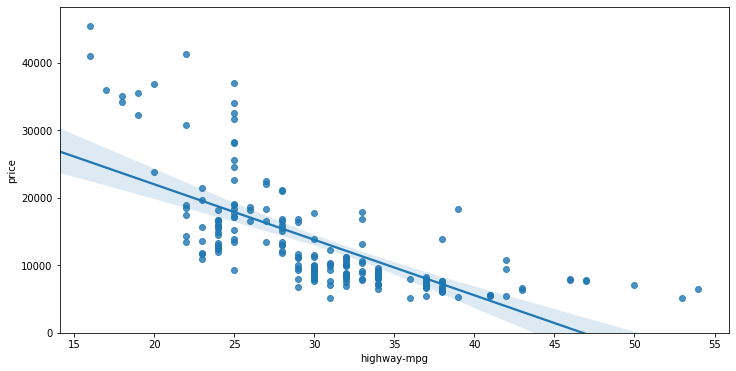

In [18]:
plt.figure(figsize = (12, 6))
sns.regplot(x = 'highway-mpg', y = 'price', data = data)
plt.ylim(0,)

#### Peak-RPM vs Car Price Plot

(0, 47428.79888384604)

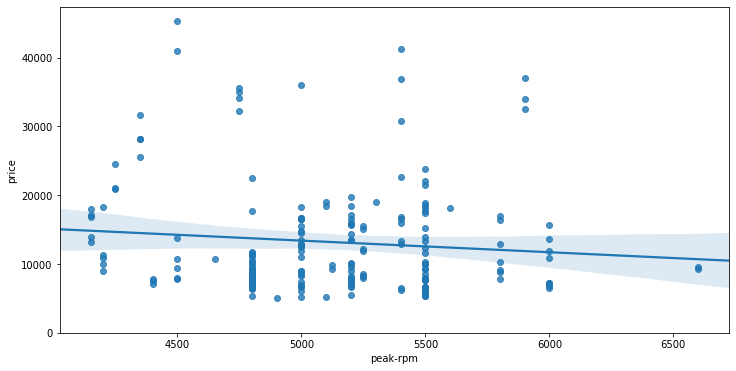

In [19]:
plt.figure(figsize = (12, 6))
sns.regplot(x = 'peak-rpm', y = 'price', data = data)
plt.ylim(0,)

Comparing the regression plot of _peak-rpm_ and _highway-mpg_ we see that the points for _highway-mpg_ are much closer to the generated line and on the average decrease. The points for _peak-rpm_ are more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the _peak-rpm_ increases.

In [20]:
data[["peak-rpm", "highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


The above table verifies that the variable _highway-mpg_ has a strong correlation with _price_ , it is approximate -0.704692 compared to _peak-rpm_ which is approximate -0.101616. 

#### Residual Plot

(0, 22450.668458176668)

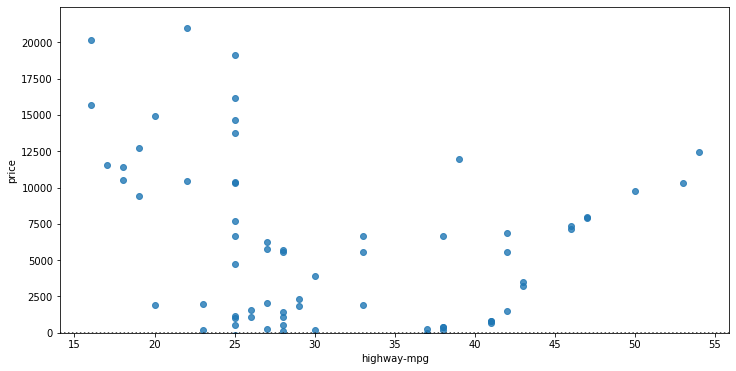

In [21]:
plt.figure(figsize = (12, 6))
sns.residplot(data['highway-mpg'], data['price'])
plt.ylim(0,)

From the residual plot above, it can be noticed that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

#### Plot for Multiple Linear Regression Analysis

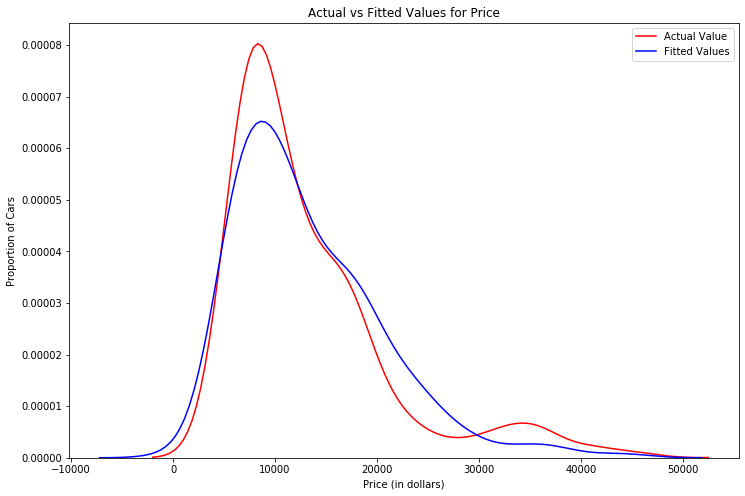

In [22]:
Y_hat = lr.predict(Z)
plt.figure(figsize=(12, 8))


ax1 = sns.distplot(data['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In the above distribution plot, we can see that fitted values are very close to the actual values, since the two dimensions overlap to a fair extent.

### Polynomial Regression

In [26]:
def PollyPlot(model, independent_variable, dependent_variable, Name):
    x1 = np.linspace(15, 55, 100)
    y1 = model(x1)
    
    plt.plot(independent_variable, dependent_variable, '.', x1, y1, '-')
    plt.title('Polynomial fit for Price ~ Highway-mpg')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price')
    
    plt.show()
    plt.close()

In [27]:
x = data['highway-mpg']
y = data['price']

In [28]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print("The linear model is: \n", p)

The linear model is: 
         3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


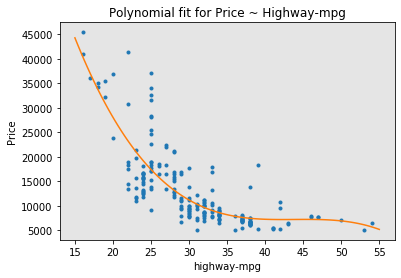

In [29]:
PollyPlot(p, x, y, 'highway-mpg')

From plotting the above graph we can see that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

Applying polynomial transformations to the data:

In [30]:
pf=PolynomialFeatures(degree=2)
pf

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [31]:
Z_pf=pf.fit_transform(Z)

In [32]:
Z.shape

(201, 4)

In [33]:
Z_pf.shape

(201, 15)

### Pipeline

In [34]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [35]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [36]:
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [37]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [38]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]


array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

### Prediction

#### Determing the Mean Squared Error for different Models

**Mean Squared Error for Simple Linear Regression Model is:**

In [79]:
mse = mean_squared_error(data['price'], Y_hat)
print('\nThe mean square error of price and predicted value is: ', mse)


The mean square error of price and predicted value is:  11980366.87072649


**Mean Squared Error for Multiple Linear Regression Model is:**

In [80]:
lr.fit(Z, data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
ypm = lr.predict(Z)
print('\nThe mean square error of price and predicted value using multifit is: ',
      mean_squared_error(data['price'], ypm))


The mean square error of price and predicted value using multifit is:  11980366.87072649


**Mean Squared Error for Polynomial Fit Model is:**

In [82]:
print("\nThe mean square error of price and predicted value using multifit is: ", mean_squared_error(data['price'], p(x)))


The mean square error of price and predicted value using multifit is:  20474146.42636125


### Decision Making: Determing a Good Model Fit

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, a good model can be determined from them as:


    1. When comparing models, the model with the higher R-squared value is a better fit for the data.
    2. When comparing models, the model with the smallest MSE value is a better fit for the data.

**Simple Linear Regression: Using _highway-mpg_ as the Predictor Variable for Price**


    1. R-squared Value: 0.49659118843391759
    2. Mean Squared Error: 3.16x10^7
    
**Multiple Linear Regression: Using _horsepower_, _curb-weight_, engine-size_, _highway-mpg_ as the Predictor Variable for Price**


    1. R-squared Value: 0.80896354913783497
    2. Mean Squared Error: 1.2x10^7

**Polynomial Fit: Using _highway-mpg_ as the Predictor Variable for Price**


    1. R-squared Value: 0.6741946663906514
    2. Mean Squared Error: 2.05x10^7


#### Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)

Usually, the more variables we have, the better our model is at predicting, but this is not always true. Sometimes we may not have enough data, may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, the Mean Squared Error(MSE) and R-Square should be checked.

So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.

R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~ 0.497) is very small compared to the R-squared for the MLR (~ 0.809).

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

#### Simple Linear Regression Model (SLR) vs Polynomial Fit

MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.

R-squared: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.

Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.

#### Multiple Linear Regression Model (MLR) vs Polynomial Fit

MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.

R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.

### Conclusion

Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.

# MLflow Integration

In [ ]:
from __future__ import print_function

import sys,os
from argparse import ArgumentParser
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession
import mlflow
from mlflow import version
from mlflow import spark as mlflow_spark

print("MLflow Version:", mlflow.version.VERSION)
print("Tracking URI:", mlflow.tracking.get_tracking_uri())
experiment_name = "automobileEDA"
print("experiment_name:",experiment_name)
mlflow.set_experiment(experiment_name)

def train(max_depth, max_bins):
    print("Parameters: max_depth: {}  max_bins: {}".format(max_depth,max_bins))
    spark = SparkSession.builder.appName("DecisionTreeClassificationExample").getOrCreate()

    # Load the data stored in LIBSVM format as a DataFrame.
    #data_path = "../data/sample_libsvm_data.txt"
    data = spark.read.format("automobileEDA.csv")

    # Index labels, adding metadata to the label column.
    # Fit on whole dataset to include all labels in index.
    labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data)

    # Automatically identify categorical features, and index them.
    # We specify maxCategories so features with > 4 distinct values are treated as continuous.
    featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)

    # Split the data into training and test sets
    (trainingData, testData) = data.randomSplit([0.7, 0.3])

    # Train a DecisionTree model.
    mlflow.log_param("max_depth",max_depth)
    mlflow.log_param("max_bins",max_bins)
    dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", maxDepth=max_depth, maxBins=max_bins)

    # Chain indexers and tree in a Pipeline.
    pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

    # Train model.  This also runs the indexers.
    model = pipeline.fit(trainingData)

    # Make predictions
    predictions = model.transform(testData)

    # Select example rows to display.
    predictions.select("prediction", "indexedLabel", "features").show(5)

    # Select (prediction, true label) and compute test error.
    evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
    accuracy = evaluator.evaluate(predictions)
    test_error = 1.0 - accuracy
    print("Test Error = {} ".format(test_error))

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("test_error", test_error)

    treeModel = model.stages[2]
    print(treeModel)

    mlflow_spark.log_model(model, "spark-model")
    #mlflow.mleap.log_model(model, testData, "mleap-model") # TODO: Bombs :(

    spark.stop()

if __name__ == "__main__":
    parser = ArgumentParser()
    parser.add_argument("--max_depth", dest="max_depth", help="max_depth", default=2, type=int)
    parser.add_argument("--max_bins", dest="max_bins", help="max_bins", default=32, type=int)
    args = parser.parse_args()
    current_file = os.path.basename(__file__)
    print("MLflow Version:", version.VERSION)

    client = mlflow.tracking.MlflowClient()
    print("experiment_id:",client.get_experiment_by_name(experiment_name).experiment_id)

    with mlflow.start_run(source_name=current_file) as run:
        print("run_id:",run.info.run_uuid)
        print("experiment_id:",run.info.experiment_id)
        train(args.max_depth,args.max_bins)


In [ ]:
from __future__ import print_function
import sys
import mlflow
import mlflow.spark as mlflow_spark
from pyspark.sql import SparkSession

print("MLflow Version:", mlflow.version.VERSION)
print("Tracking URI:", mlflow.tracking.get_tracking_uri())

if __name__ == "__main__":
    run_id = sys.argv[1]
    print("run_id:",run_id)
    spark = SparkSession.builder.appName("Predict").getOrCreate()

    data_path = "../data/sample_libsvm_data.txt"
    print("data_path:",data_path)
    data = spark.read.format("libsvm").load(data_path)

    model = mlflow_spark.load_model("spark-model", run_id=run_id)
    predictions = model.transform(data)

    print("Prediction Dataframe")
    predictions.printSchema()

    print("Filtered Prediction Dataframe")
    df = predictions.select("prediction", "indexedLabel","probability").filter("prediction <> indexedLabel")
    df.printSchema()
    df.show(5,False)